In [48]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
import numpy as np
import os

In [49]:
X_train = []
Y_train = []
image_size = 150
labels = ['fractured','not_fractured']
for i in labels:
    folderPath = os.path.join(r"C:\Users\asus\OneDrive - SRM Institute of Science & Technology\Desktop\Healthathon\X_ray_Bonefracture\training",i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join(r"C:\Users\asus\OneDrive - SRM Institute of Science & Technology\Desktop\Healthathon\X_ray_Bonefracture\testing",i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [50]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(9463, 150, 150, 3)

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [52]:
Y_train[0:3]

array(['not_fractured', 'not_fractured', 'fractured'], dtype='<U13')

In [53]:
y_train

array(['not_fractured', 'not_fractured', 'not_fractured', ...,
       'not_fractured', 'fractured', 'fractured'], dtype='<U13')

In [54]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [55]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [56]:
y_train_new

[1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,


In [57]:
'''
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input

# Define the model using Input as the first layer
model = Sequential()

# Add an Input layer to define the shape of the input data
model.add(Input(shape=(150, 150, 3)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))

'''

"\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input\n\n# Define the model using Input as the first layer\nmodel = Sequential()\n\n# Add an Input layer to define the shape of the input data\nmodel.add(Input(shape=(150, 150, 3)))\n\nmodel.add(Conv2D(32, (3, 3), activation='relu'))\nmodel.add(Conv2D(64, (3, 3), activation='relu'))\nmodel.add(MaxPooling2D(2, 2))\nmodel.add(Dropout(0.3))\nmodel.add(Conv2D(64, (3, 3), activation='relu'))\nmodel.add(Conv2D(64, (3, 3), activation='relu'))\nmodel.add(Dropout(0.3))\nmodel.add(MaxPooling2D(2, 2))\nmodel.add(Dropout(0.3))\nmodel.add(Conv2D(128, (3, 3), activation='relu'))\nmodel.add(Conv2D(128, (3, 3), activation='relu'))\nmodel.add(Conv2D(128, (3, 3), activation='relu'))\nmodel.add(MaxPooling2D(2, 2))\nmodel.add(Dropout(0.3))\nmodel.add(Conv2D(128, (3, 3), activation='relu'))\nmodel.add(Conv2D(256, (3, 3), activation='relu'))\nmodel.add(MaxPooling2D(2, 2))\nmo

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam

# Define the model
model = Sequential([
    Input(shape=(150, 150, 3)),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    Dense(2, activation='softmax')  # Changed to 2 units with softmax activation
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',  # Changed to categorical_crossentropy
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,634 (13.17 MB)

 Trainable params: 3,453,634 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,634 (13.17 MB)

 Trainable params: 3,453,634 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
#model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [61]:
X_train.shape

(8516, 150, 150, 3)

In [62]:
history = model.fit(X_train,y_train,epochs=10,validation_split=0.1)

Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 73s 282ms/step - accuracy: 0.6248 - loss: 2.8515 - val_accuracy: 0.8779 - val_loss: 0.3306
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 66s 275ms/step - accuracy: 0.8395 - loss: 0.3674 - val_accuracy: 0.9484 - val_loss: 0.1858
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 68s 285ms/step - accuracy: 0.9230 - loss: 0.2021 - val_accuracy: 0.9390 - val_loss: 0.1577
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 70s 293ms/step - accuracy: 0.9484 - loss: 0.1362 - val_accuracy: 0.9660 - val_loss: 0.0985
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 72s 301ms/step - accuracy: 0.9670 - loss: 0.0939 - val_accuracy: 0.9683 - val_loss: 0.1012
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 71s 296ms/step - accuracy: 0.9754 - loss: 0.0740 - val_accuracy: 0.9847 - val_loss: 0.0520
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 71s 295ms/step - accuracy: 0.9825 - loss: 0.0563 - val_accuracy: 0.9812 - val_loss: 0.0515
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 68s 285ms/step - accuracy: 0.9840 - loss: 0

In [63]:
y_pred = model.predict(X_test)

30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step


In [64]:
scores = model.evaluate(X_test,y_test)

30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9902 - loss: 0.0287


In [65]:
scores = model.evaluate(X_train, y_train,verbose=1)

267/267 ━━━━━━━━━━━━━━━━━━━━ 26s 97ms/step - accuracy: 0.9993 - loss: 0.0061


In [66]:
model

<Sequential name=sequential_5, built=True>

In [67]:
model.save_weights('.weights.h5')

In [68]:
model.save('saved.h5')

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

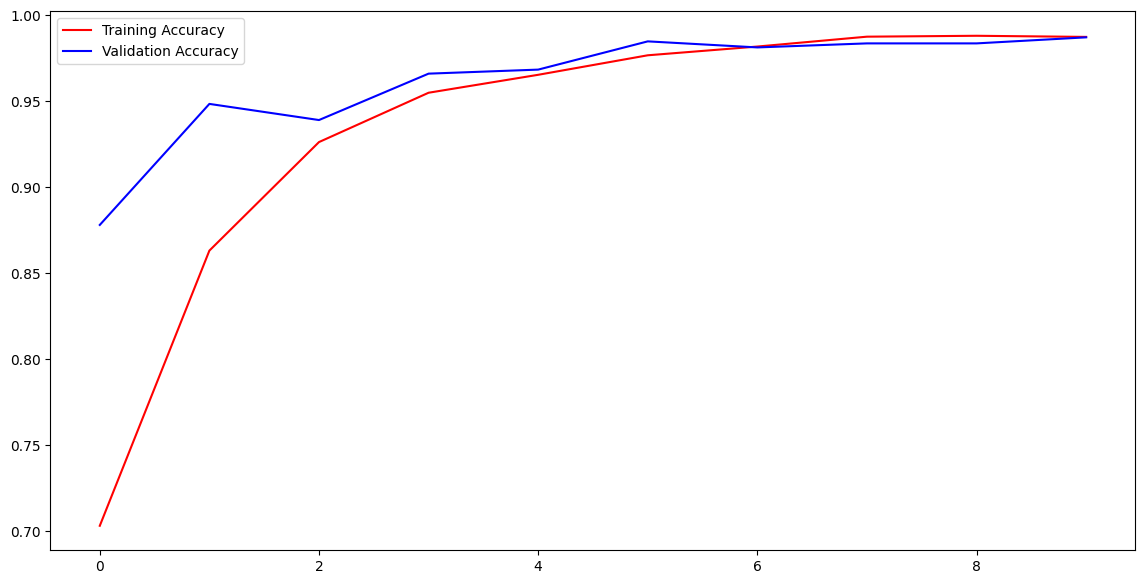

In [70]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

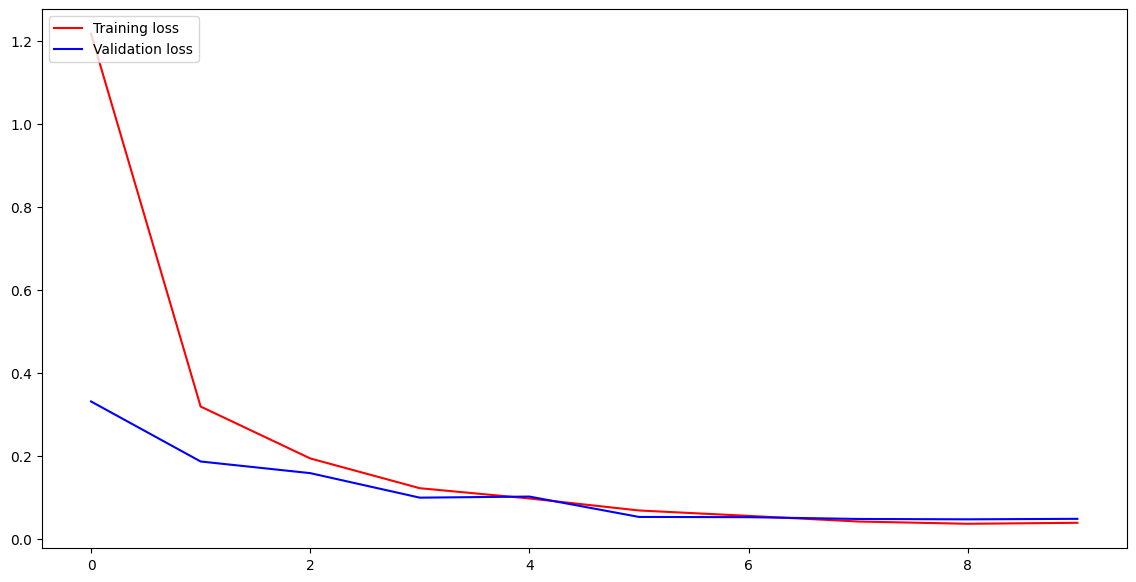

In [71]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [73]:
img = cv2.imread(r"C:\Users\asus\OneDrive - SRM Institute of Science & Technology\Desktop\Healthathon\X_ray_Bonefracture\training\not_fractured\9-rotated1-rotated1-rotated3.jpg")
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [74]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

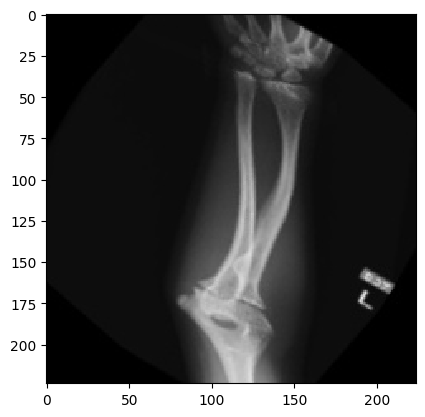

In [75]:
from tensorflow.keras.preprocessing import image
img = image.load_img(r"C:\Users\asus\OneDrive - SRM Institute of Science & Technology\Desktop\Healthathon\X_ray_Bonefracture\training\not_fractured\9-rotated1-rotated1-rotated3.jpg")
plt.imshow(img,interpolation='nearest')
plt.show()

In [76]:
a=model.predict(img_array)
indices = a.argmax()
indices



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


1

In [77]:
model.save('model.h5')

In [35]:
# img_path = r"C:\Users\asus\OneDrive - SRM Institute of Science & Technology\Desktop\Brain_Tumor\Testing\no_tumor\image(2).jpg"
# img = cv2.imread(img_path)
# plt.imshow(img)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


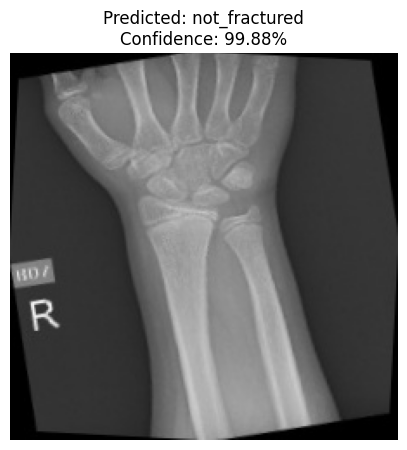

ValueError: not enough values to unpack (expected 3, got 2)

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

def predict_and_display_fracture(model, img_path, class_names):
    # Load and preprocess the image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img_resized = cv2.resize(img, (150, 150))
    img_array = np.array(img_resized)
    img_array = img_array.reshape(1, 150, 150, 3)

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_class_index]
    confidence = round(100 * np.max(predictions[0]), 2)

    # Display the image and prediction
    plt.figure(figsize=(5, 7))
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence}%")
    plt.axis('off')
    plt.show()

    return predicted_class, confidence

# Load the model
model_path = r'C:\Users\asus\OneDrive - SRM Institute of Science & Technology\Desktop\Healthathon\X_ray_Bonefracture\model_bone_fracture.h5'
model = load_model(model_path)

# Define class names
class_names = ['fractured', 'not_fractured']

# Predict on a new image
img_path = r"C:\Users\asus\OneDrive - SRM Institute of Science & Technology\Desktop\Healthathon\X_ray_Bonefracture\testing\not_fractured\1-rotated1-rotated1-rotated2-rotated1.jpg"
predicted_class, confidence = predict_and_display_fracture(model, img_path, class_names)

print(f"Predicted class: {predicted_class}")
print(f"Confidence: {confidence}%")